<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/Application_Predict_Transparent_Conductors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
import os

# Upload the API token.
def get_kaggle_credentials():
  token_dir = os.path.join(os.path.expanduser("~"),".kaggle")
  token_file = os.path.join(token_dir, "kaggle.json")
  if not os.path.isdir(token_dir):
    os.mkdir(token_dir)
  try:
    with open(token_file,'r') as f:
      pass
  except IOError as no_file:
    try:
      from google.colab import files
    except ImportError:
      raise no_file
    
    uploaded = files.upload()
    
    if "kaggle.json" not in uploaded:
      raise ValueError("You need an API key! see: "
                       "https://github.com/Kaggle/kaggle-api#api-credentials")
    with open(token_file, "wb") as f:
      f.write(uploaded["kaggle.json"])
    os.chmod(token_file, 600)

get_kaggle_credentials()

Saving kaggle.json to kaggle.json


In [0]:
import kaggle

In [0]:
competition_name = 'nomad2018-predict-transparent-conductors'

In [0]:
kaggle.api.competition_download_files(competition_name, competition_name)

In [0]:
import zipfile

def load_data_from_zip(competition, file):
  with zipfile.ZipFile(os.path.join(competition, file), 'r') as zip_ref:
    unzipped_file = zip_ref.namelist()[0]
    zip_ref.extractall(competition)

In [0]:
load_data_from_zip(competition_name, 'train.csv.zip')

In [0]:
load_data_from_zip(competition_name, 'test.csv.zip')

In [0]:
load_data_from_zip(competition_name, 'sample_submission.csv.zip')

## Data Exploration

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [56]:
train = pd.read_csv('/content/nomad2018-predict-transparent-conductors/train.csv',names=['id', 'spacegroup', 'natoms', 'al',
       'ga', 'in', 'a',
       'b', 'c',
       'alpha', 'beta',
       'gamma', 'E0',
       'bandgap'],header=0,sep=',')
test = pd.read_csv('/content/nomad2018-predict-transparent-conductors/test.csv',names=['id', 'spacegroup', 'natoms', 'al',
       'ga', 'in', 'a',
       'b', 'c',
       'alpha', 'beta',
       'gamma'],header=0,sep=',')

full = pd.concat([train,test])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [12]:
train.head()

,id,spacegroup,natoms,al,ga,in,a,b,c,alpha,beta,gamma,E0,bandgap
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


In [55]:
test.head()

,id,spacegroup,natoms,al,ga,in,a,b,c,alpha,beta,gamma
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006
1,2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015
2,3,167,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,90.0109,120.0014
3,4,12,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,103.8581,90.0002
4,5,12,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,104.5929,90.0001


In [0]:
train["alog"] = np.log(train["a"]) 
train["blog"] = np.log(train["b"]) 
train["clog"] = np.log(train["c"]) 
train["gammalog"] = np.log(train["gamma"])


In [0]:
test["alog"] = np.log(test["a"]) 
test["blog"] = np.log(test["b"]) 
test["clog"] = np.log(test["c"]) 
test["gammalog"] = np.log(test["gamma"])

In [13]:
train["spacegroup"].unique()

array([ 33, 194, 227, 167, 206,  12])

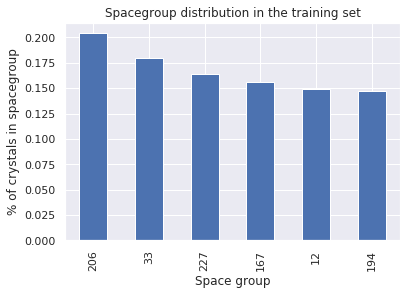

In [14]:
train['spacegroup'].value_counts(normalize=True).plot.bar()
plt.title('Spacegroup distribution in the training set')
plt.ylabel('% of crystals in spacegroup')
plt.xlabel('Space group')
plt.show()

In [15]:
train[['a','b','c','alpha','beta','gamma']][train['spacegroup'] == 12].describe()

,a,b,c,alpha,beta,gamma
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,21.643844,5.517496,6.113807,89.999838,104.572380,90.000112
std,5.224161,1.350332,0.241298,0.000290,0.525823,0.000058
min,11.941300,2.942300,5.672500,89.998900,103.659100,90.000000
25%,24.091325,5.942450,5.949250,89.999700,104.202400,90.000100
50%,24.440850,6.211500,6.107900,89.999800,104.596500,90.000100
75%,24.603600,6.298850,6.240900,90.000000,104.874100,90.000100
max,24.913400,6.676300,6.904800,90.000400,106.168200,90.000300


**Original Distribution**

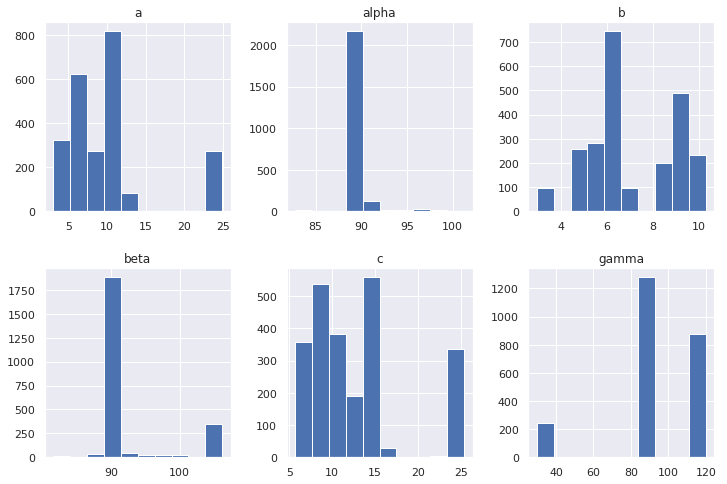

In [33]:
train.hist(figsize=(12,8),column = ['a','b','c','alpha','beta','gamma'],layout =(2,3))
plt.show()

**Transformed Distribution**

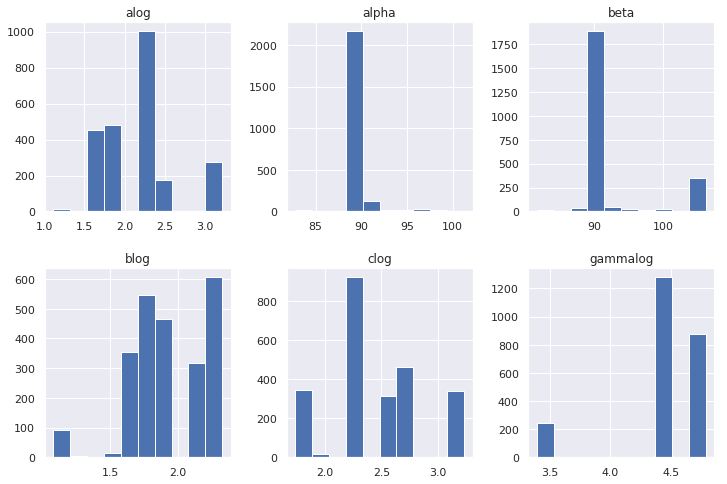

In [35]:
train.hist(figsize=(12,8),column = ['alog','blog','clog','alpha','beta','gammalog'],layout =(2,3))
plt.show()

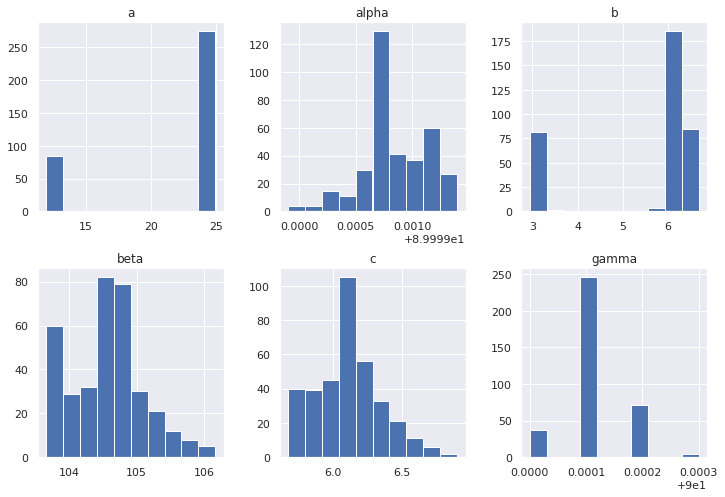

In [39]:
train[train['spacegroup'] == 12].hist(figsize=(12,8),column = ['a','b','c','alpha','beta','gamma'],layout =(2,3))
plt.show()

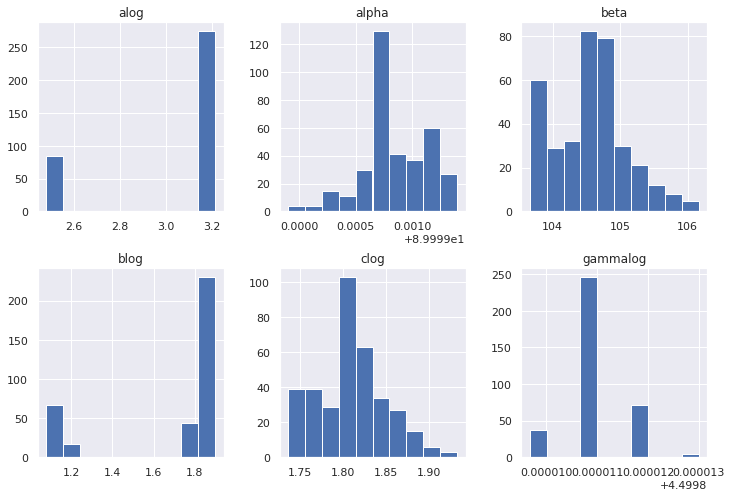

In [38]:
train[train['spacegroup'] == 12].hist(figsize=(12,8),column = ['alog','blog','clog','alpha','beta','gammalog'],layout =(2,3))
plt.show()

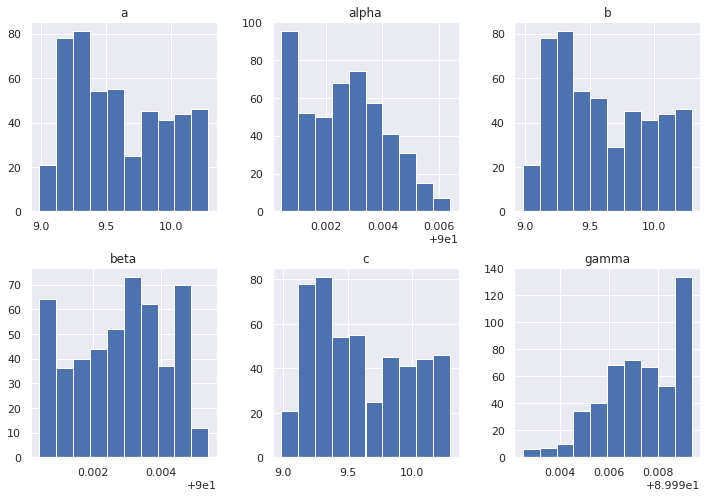

In [17]:
train[train['spacegroup'] == 206].hist(figsize=(12,8),column = ['a','b','c','alpha','beta','gamma'],layout =(2,3))
plt.show()

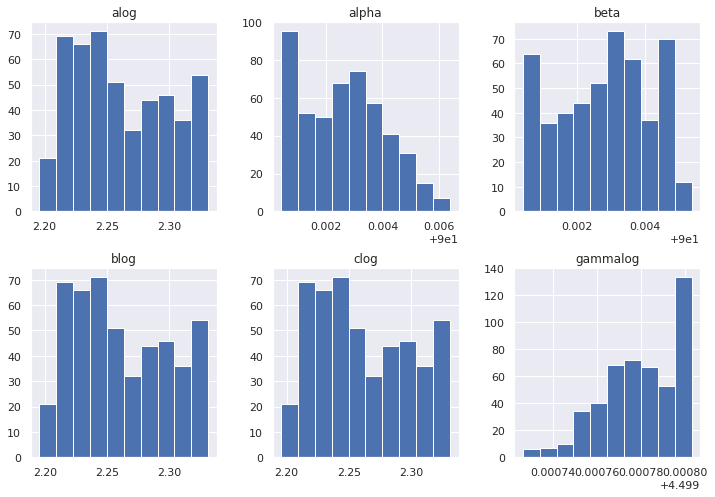

In [40]:
train[train['spacegroup'] == 206].hist(figsize=(12,8),column = ['alog','blog','clog','alpha','beta','gammalog'],layout =(2,3))
plt.show()

**By looking at below charts it seems like a mistake to independently model E0 and Bandgap**

The are negatively correlated.

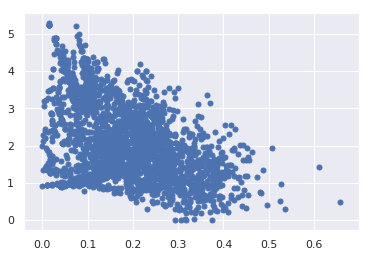

In [41]:
plt.scatter(train['E0'], train['bandgap'], s=25, cmap='blue') 

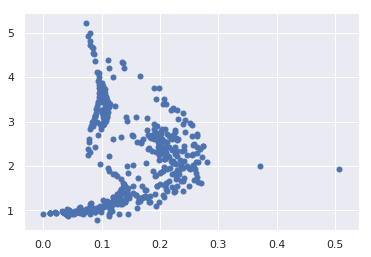

In [42]:
plt.scatter(train[train['spacegroup'] == 206]['E0'], train[train['spacegroup'] == 206]['bandgap'], s=25, cmap='blue') 

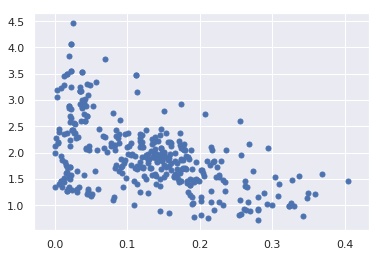

In [44]:
plt.scatter(train[train['spacegroup'] == 12]['E0'], train[train['spacegroup'] == 12]['bandgap'], s=25, cmap='blue') 

## Case 1 MultiOutputRegressor


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [0]:
X = train.values[:, 1:-2]
y = train.values[:, -2:]

In [58]:
X.shape, y.shape

((2400, 11), (2400, 2))

In [59]:
X[0, :], y[0, :]

(array([33.    , 80.    ,  0.625 ,  0.375 ,  0.    ,  9.9523,  8.5513,
         9.1775, 90.0026, 90.0023, 90.0017]), array([0.068 , 3.4387]))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
max_depth = 30

In [0]:
multi_reg = MultiOutputRegressor(
    estimator=RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=42)
)

In [0]:
multi_reg_pipe = Pipeline(steps=[('scale', StandardScaler()), ('multi_reg', multi_reg)])

In [70]:
multi_reg_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('multi_reg',
                 MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                                      criterion='mse',
                                                                      max_depth=30,
                                                                      max_features='auto',
                                                                      max_leaf_nodes=None,
                                                                      min_impurity_decrease=0.0,
                                                                      min_impurity_split=None,
                                                                      min_samples_leaf=1,
                                                                      min_samples_split=2,
                                  

In [71]:
print("Score = %.2f" % multi_reg_pipe.score(X_test, y_test))

Score= 0.86


In [0]:
y_pred = multi_reg_pipe.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, multioutput='raw_values')

array([0.00245648, 0.0673143 ])

In [75]:
from sklearn.metrics import explained_variance_score

explained_variance_score(y_test, y_pred)

0.8576412328599393

In [0]:
X_sub = test.values[:, 1:]

In [81]:
X_sub[0,:]

array([33.    , 80.    ,  0.1875,  0.4688,  0.3438, 10.5381,  9.0141,
        9.6361, 89.9997, 90.0003, 90.0006])

## Use xgboost


In [0]:
import xgboost as xgb

In [106]:
clf = .fit(X_train, y_train)

[10:02:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
multi_xgb = MultiOutputRegressor(
    estimator=xgb.XGBRegressor()
)

In [0]:
multi_xgb_pipe = Pipeline(steps=[('scale', StandardScaler()), ('multi_reg', multi_xgb)])

In [115]:
multi_xgb_pipe.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:614: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:614: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase memory consumption")


[10:08:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:08:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('multi_reg',
                 MultiOutputRegressor(estimator=XGBRegressor(base_score=0.5,
                                                             booster='gbtree',
                                                             colsample_bylevel=1,
                                                             colsample_bynode=1,
                                                             colsample_bytree=1,
                                                             gamma=0,
                                                             importance_type='gain',
                                                             learning_rate=0.1,
                                                             max_delta_step=0,
                                                             max_depth=3,
                                                          

In [0]:
y_pred = multi_xgb_pipe.predict(X_test)

In [118]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, multioutput='raw_values')

array([0.00228149, 0.06031715])

## Case 2 Implement Stackable Estimators

In [104]:
!pip install -U heamy

  Stored in directory: /root/.cache/pip/wheels/ab/05/27/334fcc59e6279e70d84880e6988ea934d740829a900f14352f
Successfully built heamy


## Case 3 KFold + Basic XGB

In [0]:
multi_xgb_pipe_list = []
from sklearn.model_selection import RepeatedKFold
from sklearn.utils import shuffle

X_s, y_s = shuffle(X, y, random_state=42)
k = RepeatedKFold(n_splits=2, n_repeats=2)
for train_index, test_index in k.split(X):
  X_train, y_train = X[train_index], y[train_index]
  X_test, y_test   = X[test_index], y[test_index]
  
  multi_xgb_pipe = Pipeline(steps=[('scale', StandardScaler()), ('multi_reg', multi_xgb)])
  multi_xgb_pipe.fit(X_train, y_train)
  print("MSE = ", mean_squared_error(y_test, multi_xgb_pipe.predict(X_test), multioutput='raw_values'))
  multi_xgb_pipe_list.append(multi_xgb_pipe)

In [143]:
len(multi_xgb_pipe_list)

4

In [0]:
y_sub = np.zeros((X_sub.shape[0], 2))
for model_xgb in multi_xgb_pipe_list:
  y_sub += model_xgb.predict(X_sub)
  print(y_sub[0, :])
  
y_sub = y_sub / len(multi_xgb_pipe_list)

In [0]:
y_sub[:4, :]

## Submission Logistics

In [0]:
#y_sub = multi_reg_pipe.predict(X_sub)
#y_sub = multi_xgb_pipe.predict(X_sub)

In [0]:
idx = 0
with open("submission.csv", "w") as fp:
  fp.write(",".join(["id","formation_energy_ev_natom","bandgap_energy_ev"]))
  fp.write("\n")
  for v1, v2 in zip(y_sub[:, 0], y_sub[:, 1]):
    idx += 1
    fp.write(",".join(list(map(str, (idx, v1, v2)))))
    fp.write("\n")


In [0]:
!head /content/submission.csv

In [149]:
!kaggle competitions submit -c nomad2018-predict-transparent-conductors -f /content/submission.csv -m "Random Kfold + Basic XGB Submission"

100% 24.8k/24.8k [00:01<00:00, 17.9kB/s]
Successfully submitted to Nomad2018 Predicting Transparent Conductors